# Lecture 18: Monte Carlo Simulations of Adsorption on Surfaces

## Learning Objectives

By the end of this lecture, you should be able to

1. Describe the concept of adsorption and its importance in surface science.
2. Implement a Monte Carlo simulation to study adsorption on surfaces.
3. Analyze the results of a Monte Carlo simulation to determine the adsorption isotherm.

## Introduction

Adsorption is the process by which molecules or atoms adhere to the surface of a solid or liquid. It plays a crucial role in various applications, such as catalysis, gas separation, and drug delivery. In this project, we will explore how to simulate adsorption on solid surfaces using Monte Carlo methods.

## Adsorption on Surfaces

### Types of Adsorption

Adsorption on surfaces can be classified into three main types:

1. **Physisorption**: In physisorption, molecules are held to the surface by weak van der Waals forces. This type of adsorption is reversible and does not involve the formation of chemical bonds between the adsorbate and the surface.

2. **Chemisorption**: Chemisorption involves the formation of chemical bonds between the adsorbate and the surface. This type of adsorption is stronger than physisorption and can lead to irreversible changes in the adsorbate.

3. **Dissociative Adsorption**: In dissociative adsorption, the adsorbate molecule dissociates into atoms or radicals upon adsorption. This process is common for molecules like hydrogen and oxygen on metal surfaces.

### Adsorption Isotherms

The adsorption isotherm is a plot of the amount of adsorbate adsorbed on the surface as a function of pressure or concentration at constant temperature. The shape of the isotherm provides information about the adsorption mechanism and the surface properties.

## Lattice Gas Model

In the lattice gas model, we represent the surface as a 2D lattice where each lattice site can be occupied by an adsorbate molecule. The adsorbate molecules interact with each other and with the surface through pairwise interactions. The energy of the system is given by the sum of these pairwise interactions.

### Ideal Sorbent

In this model system, $N_s$ sorbent particles interact with $N_a$ adsorption sites on a solid surface but do not interact with each other.

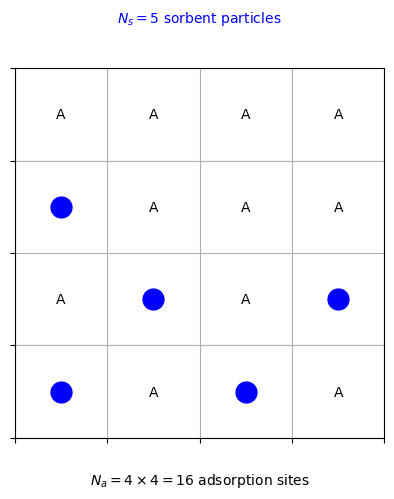

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define grid size
gridsize = 4

# Create figure and axis
fig, ax = plt.subplots()

# Create gridlines
ax.set_xticks(np.arange(0, gridsize + 1, 1))
ax.set_yticks(np.arange(0, gridsize + 1, 1))
ax.grid(True)

# Set the limits of the plot
ax.set_xlim(0, gridsize)
ax.set_ylim(0, gridsize)

# Label adsorption sites
for x in range(gridsize):
    for y in range(gridsize):
        ax.text(x + 0.5, y + 0.5, 'A', ha='center', va='center')

# Define sorbent particles' positions
sorbent_positions = [(0.5, 0.5), (2.5, 0.5), (1.5, 1.5), (3.5, 1.5), (0.5, 2.5)]

# Plot sorbent particles
for (x, y) in sorbent_positions:
    ax.plot(x, y, 'o', color='blue', markersize=15, zorder=10)

# Add labels for N_s and N_a
ax.text(2, -0.5, r'$N_a = 4 \times 4 = 16$ adsorption sites', ha='center')
ax.text(2, 4.5, r'$N_s = 5$ sorbent particles', color='blue', ha='center')

# Hide ticks
ax.set_xticklabels([])
ax.set_yticklabels([])

# Show plot
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

````{margin}
```{note}
A square lattice can be used to represent the (100) surface of face-centered cubic solids like the alkali metals Ca and Sr, group nine transition metals Rh and Ir, group ten transition metals (Ni, Pd, and Pt), group eleven transition metals (Cu, Ag, and Au), Al, and Pb.
```
````

The figure above shows an example of an ideal sorbent system with $N_s = 5$ sorbent particles and $N_a = 16$ adsorption sites on a $4 \times 4$ square lattice. The sorbent particles are represented by blue circles, and the adsorption sites are labeled with the letter "A."

In Lecture 11, we showed that the coverage of the surface by the sorbent particles can then be calculated as

$$
\theta = \frac{e^{-\beta (\epsilon - \mu)}}{1 + e^{-\beta (\epsilon - \mu)}}
$$

where $\epsilon$ is the interaction energy between the sorbent particles and the surface, $\mu$ is the chemical potential of the sorbent particles, and $\beta = \frac{1}{k_{\rm B} T}$.

```{admonition} Interpretation of Chemical Potential
:class: tip
The chemical potential $\mu$ can be interpreted as the energy change when a sorbent particle is added to the system from a reservoir at constant temperature. A positive chemical potential indicates that the sorbent particles are more likely to adsorb on the surface, while a negative chemical potential indicates that the sorbent particles are more likely to desorb from the surface.
```

### Sorbent with Mean-Field Interactions

In a more realistic model, we can introduce mean-field interactions between the sorbent particles. The mean-field interaction energy between one sorbent particle and all other sorbent particles can be set to a constant value. This interaction energy can be used to model the attractive or repulsive interactions between the sorbent particles.

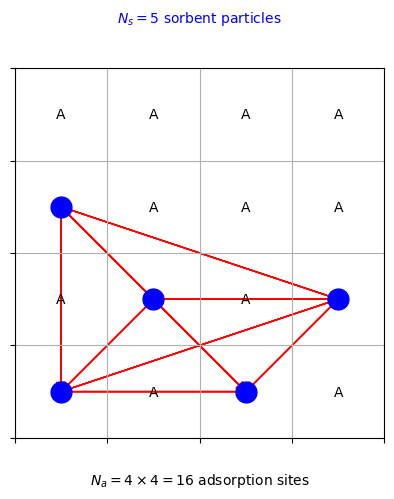

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define grid size
gridsize = 4

# Create figure and axis
fig, ax = plt.subplots()

# Create gridlines
ax.set_xticks(np.arange(0, gridsize + 1, 1))
ax.set_yticks(np.arange(0, gridsize + 1, 1))
ax.grid(True)

# Set the limits of the plot
ax.set_xlim(0, gridsize)
ax.set_ylim(0, gridsize)

# Label adsorption sites
for x in range(gridsize):
    for y in range(gridsize):
        ax.text(x + 0.5, y + 0.5, 'A', ha='center', va='center')

# Define sorbent particles' positions
sorbent_positions = [(0.5, 0.5), (2.5, 0.5), (1.5, 1.5), (3.5, 1.5), (0.5, 2.5)]

# Plot sorbent particles
for (x, y) in sorbent_positions:
    ax.plot(x, y, 'o', color='blue', markersize=15, zorder=10)

# Mean-field interaction arrows (red lines)
for (x1, y1) in sorbent_positions:
    for (x2, y2) in sorbent_positions:
        ax.arrow(x1, y1, x2 - x1, y2 - y1, head_width=0.1, head_length=0.1, fc='red', ec='red', length_includes_head=True)

# Add labels for N_s and N_a
ax.text(2, -0.5, r'$N_a = 4 \times 4 = 16$ adsorption sites', ha='center')
ax.text(2, 4.5, r'$N_s = 5$ sorbent particles', color='blue', ha='center')

# Hide ticks
ax.set_xticklabels([])
ax.set_yticklabels([])

# Show plot
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

The figure above shows the same sorbent system as before, but now with interactions between the sorbent particles represented by red arrows. In a mean-field model, these interactions are replaced by a constant mean-field interaction energy.

## Grand Canonical Monte Carlo Simulations

In Lecture 14, we implemented a basic Metropolis algorithm for the canonical ensemble. In this lecture and the associated project, we will extend the Metropolis algorithm to the grand canonical ensemble to study adsorption on surfaces.

### Grand Canonical Ensemble

In the grand canonical ensemble, the system is in contact with a reservoir of particles at constant chemical potential $\mu$, volume $V$, and inverse temperature $\beta$. The number of particles in the system is allowed to fluctuate, and the probability of finding the system in a state with $N$ particles is given by

$$
P(N) = \frac{e^{-\beta [E(N) - \mu N]}}{Z}
$$

where $E(N)$ is the energy of the system with $N$ particles, and $Z$ is the grand canonical partition function.

### Metropolis Algorithm for Grand Canonical Ensemble

To simulate the grand canonical ensemble using the Metropolis algorithm, we need to modify the acceptance criterion to account for changes in the number of particles. The acceptance probability for adding a particle to the system is given by

$$
{\rm acc}(N \rightarrow N+1) = \min\left[1, \frac{N_a - N}{N + 1} \exp\left[-\beta (E(N+1) - E(N) - \mu)\right]\right]
$$

where $N_a$ is the total number of adsorption sites on the surface. The acceptance probability for removing a particle from the system is given by

$$
{\rm acc}(N \rightarrow N-1) = \min\left[1, \frac{N}{N_a - N + 1} \exp\left[-\beta (E(N-1) - E(N) + \mu)\right]\right]
$$

## Steps for Implementing a Grand Canonical Monte Carlo Simulation

To implement a grand canonical Monte Carlo simulation for adsorption on surfaces, we can follow these steps:

1. Initialize the system with a random distribution of sorbent particles on the surface.
2. Choose a random move (addition or removal of a sorbent particle) and calculate the change in energy.
3. Accept or reject the move based on the acceptance probability.

By repeating these steps for a large number of iterations, we can sample the grand canonical ensemble and calculate the adsorption isotherm.

## Example 1: Adsorption of Ideal Sorbent Particles on a Square Lattice

Let's consider the adsorption of ideal sorbent particles on a $4 \times 4$ square lattice. We will implement a grand canonical Monte Carlo simulation to study the adsorption isotherm of the system.

### Energy Calculation

The energy of the system is given by

$$
E(N) = N \epsilon
$$

where $\epsilon$ is the interaction energy between the sorbent particles and the surface. Let's define the energy function for the system.

In [3]:
def energy_ideal_sorbent(N, epsilon=-1.0):
    """Calculate the energy of the ideal sorbent system."""
    return N * epsilon

### Grand Canonical Monte Carlo Simulation

Now, let's implement the grand canonical Monte Carlo simulation for the ideal sorbent system.

In [4]:
import numpy as np

np.random.seed(42)

def grand_canonical_mc_ideal_sorbent(N_a, mu, beta, epsilon, n_steps=10000):
    """Perform grand canonical Monte Carlo simulation for ideal sorbent particles."""
    # Initialize the system
    N = 0
    coverage = []
    
    for _ in range(n_steps):
        # Choose a random move
        if np.random.rand() < 0.5:
            # Attempt to add a particle
            energy_diff = energy_ideal_sorbent(N + 1, epsilon) - energy_ideal_sorbent(N, epsilon)
            # acc_prob = min(1, (N_a - N) / (N + 1) * np.exp(-beta * (epsilon - mu)))
            acc_prob = min(1, (N_a - N) / (N + 1) * np.exp(-beta * (energy_diff - mu)))
            if np.random.rand() < acc_prob:
                N += 1
        else:
            # Attempt to remove a particle
            energy_diff = energy_ideal_sorbent(N - 1, epsilon) - energy_ideal_sorbent(N, epsilon)
            # acc_prob = min(1, N / (N_a - N + 1) * np.exp(-beta * (epsilon + mu)))
            acc_prob = min(1, N / (N_a - N + 1) * np.exp(-beta * (energy_diff + mu)))
            if np.random.rand() < acc_prob:
                N -= 1
        
        # Calculate coverage
        theta = N / N_a
        coverage.append(theta)
    
    return coverage

### Simulation Results

Let's run the grand canonical Monte Carlo simulation for the ideal sorbent system and plot the adsorption isotherm.

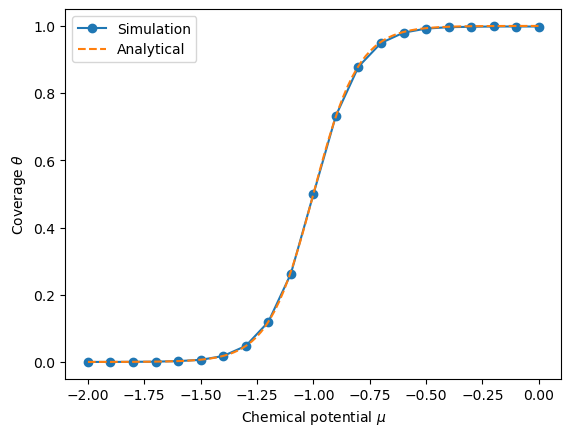

In [5]:
import matplotlib.pyplot as plt

# Define system parameters
N_a = 16
mus = np.linspace(-2, 0, 21)
beta = 10.0
epsilon = -1.0

# Perform grand canonical Monte Carlo simulation for different chemical potentials
coverages = [np.mean(grand_canonical_mc_ideal_sorbent(N_a, mu, beta, epsilon)) for mu in mus]

# Calculate the analytical solution
mus_analytical = np.linspace(-2, 0, 100)
coverages_analytical = [np.exp(beta * (mu - epsilon)) / (1 + np.exp(beta * (mu - epsilon))) for mu in mus_analytical]

# Plot the adsorption isotherm
plt.plot(mus, coverages, 'o-', label='Simulation')
plt.plot(mus_analytical, coverages_analytical, '--', label='Analytical')
plt.xlabel(r'Chemical potential $\mu$')
plt.ylabel(r'Coverage $\theta$')
plt.legend()
plt.show()

The plot above shows the adsorption isotherm for the ideal sorbent system obtained from the grand canonical Monte Carlo simulation (solid line) and the analytical solution (dashed line). The coverage of the surface increases with the chemical potential, as expected because the sorbent particles are more likely to adsorb on the surface at higher chemical potentials.

## Example 2: Adsorption of Sorbent Particles with Mean-Field Interactions

Next, let's consider the adsorption of sorbent particles with mean-field interactions on a $4 \times 4$ square lattice. We will implement a grand canonical Monte Carlo simulation to study the adsorption isotherm of the system.

### Energy Calculation

The energy of the system with mean-field interactions is given by

$$
E(N) = N \epsilon + N_a \theta z \epsilon_{\rm int}
$$

where $z$ is the coordination number of the lattice, and $\epsilon_{\rm int}$ is the mean-field interaction energy between the sorbent particles. Let's define the energy function for the system with mean-field interactions.

In [6]:
def energy_mean_field_sorbent(N, N_a, coverage, z=4, epsilon=-1.0, epsilon_int=0.1):
    """Calculate the energy of the system with mean-field interactions."""
    return N * epsilon + N_a * coverage * z * epsilon_int

```{admonition} Derivation of $N_a \theta z$
:class: dropdown
The term $N_a \theta z$ in the energy expression accounts for the mean-field interactions between the sorbent particles. The factor $N_a$ represents the total number of adsorption sites on the surface, $\theta$ is the coverage of the surface by the sorbent particles, and $z$ is the coordination number of the lattice. The product $N_a \theta z$ gives the number of interactions between each sorbent particle and its $z$ nearest neighbors on the lattice.
```

### Grand Canonical Monte Carlo Simulation

Now, let's implement the grand canonical Monte Carlo simulation for the system with mean-field interactions.

In [7]:
np.random.seed(42)

def grand_canonical_mc_mean_field_sorbent(N_a, mu, beta, epsilon, epsilon_int, n_steps=10000):
    """Perform grand canonical Monte Carlo simulation for sorbent particles with mean-field interactions."""
    # Initialize the system
    N = 0
    coverage = []
    
    for _ in range(n_steps):
        # Current coverage
        theta = N / N_a
        
        # Choose a random move
        if np.random.rand() < 0.5:
            # Attempt to add a particle
            theta_after = (N + 1) / N_a
            energy_diff = (energy_mean_field_sorbent(N + 1, N_a, theta_after, epsilon=epsilon, epsilon_int=epsilon_int) -
                           energy_mean_field_sorbent(N, N_a, theta, epsilon=epsilon, epsilon_int=epsilon_int))
            acc_prob = min(1, (N_a - N) / (N + 1) * np.exp(-beta * (energy_diff - mu)))
            if np.random.rand() < acc_prob:
                N += 1
        else:
            # Attempt to remove a particle
            theta_after = (N - 1) / N_a
            energy_diff = (energy_mean_field_sorbent(N - 1, N_a, theta_after, epsilon=epsilon, epsilon_int=epsilon_int) -
                           energy_mean_field_sorbent(N, N_a, theta, epsilon=epsilon, epsilon_int=epsilon_int))
            acc_prob = min(1, N / (N_a - N + 1) * np.exp(-beta * (energy_diff + mu)))
            if N > 0 and np.random.rand() < acc_prob:
                N -= 1
        
        # Update coverage
        theta = N / N_a
        coverage.append(theta)
    
    return coverage

### Simulation Results

Let's run the grand canonical Monte Carlo simulation for the system with mean-field interactions and plot the adsorption isotherm.

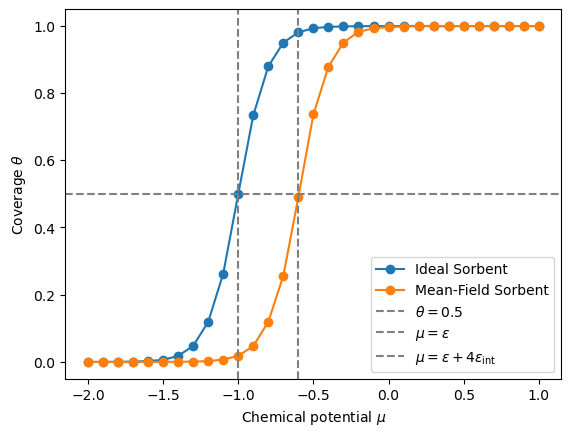

In [8]:
# Define system parameters
N_a = 16
mus = np.linspace(-2, 1, 31)
beta = 10.0
epsilon = -1.0
epsilon_int = 0.1

# Perform grand canonical Monte Carlo simulation for different chemical potentials
coverages_ideal_sorbent = [np.mean(grand_canonical_mc_ideal_sorbent(N_a, mu, beta, epsilon)) for mu in mus]
coverages_mean_field_sorbent = [np.mean(grand_canonical_mc_mean_field_sorbent(N_a, mu, beta, epsilon, epsilon_int)) for mu in mus]

# Plot the adsorption isotherm
plt.plot(mus, coverages_ideal_sorbent, 'o-', label='Ideal Sorbent')
plt.plot(mus, coverages_mean_field_sorbent, 'o-', label='Mean-Field Sorbent')
plt.axhline(y=0.5, color='gray', linestyle='--', label=r'$\theta = 0.5$')
plt.axvline(x=epsilon, color='gray', linestyle='--', label=r'$\mu = \epsilon$')
plt.axvline(x=epsilon + 4 * epsilon_int, color='gray', linestyle='--', label=r'$\mu = \epsilon + 4 \epsilon_{\rm int}$')
plt.xlabel(r'Chemical potential $\mu$')
plt.ylabel(r'Coverage $\theta$')
plt.legend()
plt.show()

The plot above shows the adsorption isotherm for the ideal sorbent system and the system with mean-field interactions obtained from the grand canonical Monte Carlo simulation. The dashed lines indicate the critical chemical potentials where the coverage of the surface is equal to 0.5.

## Conclusion

In this lecture, we introduced the concept of adsorption on surfaces and discussed the importance of Monte Carlo simulations in studying adsorption phenomena. We implemented grand canonical Monte Carlo simulations for ideal sorbent particles and sorbent particles with mean-field interactions on a square lattice. The simulations allowed us to calculate the adsorption isotherms of the systems and analyze the effects of chemical potential and interaction energies on the adsorption behavior.

```{note}
In the associated project, you will have the opportunity to explore more complex adsorption models and study the effects of different parameters on the adsorption isotherm. You will also learn how to analyze the simulation results and extract valuable information about the adsorption process.
```